<a href="https://colab.research.google.com/github/pedroraffo/ALC/blob/main/TP_Libson_Vernay_Raffo_corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Carga de paquetes necesarios para graficar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Para leer archivos
import geopandas as gpd # Para hacer cosas geográficas
import seaborn as sns # Para hacer plots lindos
import networkx as nx # Construcción de la red en NetworkX
import scipy


# Preambulo

En esta sección cargamos los datos y los visualizamos. También construimos la matriz de adyacencia de la red de museos.

## Carga de datos de los museos

El listado de los museos, con el que se construye el [mapa](https://mapas.museosabiertos.org/museos/caba/), lo podemos encontrar [acá](https://github.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/blob/principal/data/export.geojson?short_path=bc357f3). También descargamos los barrios de CABA como complemento para los gráficos.

In [2]:
# Leemos el archivo, retenemos aquellos museos que están en CABA, y descartamos aquellos que no tienen latitud y longitud
museos = gpd.read_file('https://raw.githubusercontent.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/refs/heads/principal/data/export.geojson')
barrios = gpd.read_file('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson')

## Visualización

<Axes: >

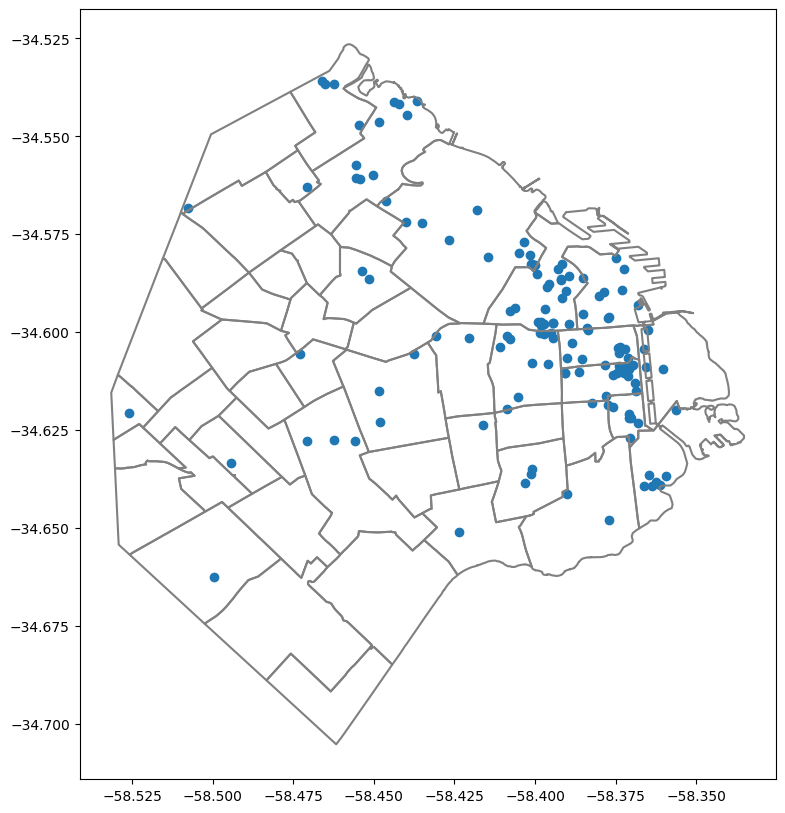

In [3]:
# Armamos el gráfico para visualizar los museos
fig, ax = plt.subplots(figsize=(10, 10))
barrios.boundary.plot(color='gray',ax=ax)
museos.plot(ax=ax)

## Cálculo de la matriz de distancias

Ahora construimos la matriz de distancias entre todos los museos. Como la tierra es un [geoide](https://es.wikipedia.org/wiki/Geoide) (es decir que no es [plana](https://es.wikipedia.org/wiki/Terraplanismo)), el cálculo de distancias no es una operación obvia. Una opción es proyectar a un [sistema de coordenadas local](https://geopandas.org/en/stable/docs/user_guide/projections.html), de forma tal que las distancias euclideas se correspondan con las distancias en metros. En este notebook usamos [EPSG](https://en.wikipedia.org/wiki/EPSG_Geodetic_Parameter_Dataset) 22184.

In [4]:
# En esta línea:
# Tomamos museos, lo convertimos al sistema de coordenadas de interés, extraemos su geometría (los puntos del mapa),
# calculamos sus distancias a los otros puntos de df, redondeamos (obteniendo distancia en metros), y lo convertimos a un array 2D de numpy
D = museos.to_crs("EPSG:22184").geometry.apply(lambda g: museos.to_crs("EPSG:22184").distance(g)).round().to_numpy()

### Matriz de adyacencia: construimos una matriz conectando a cada museo con los $m$ más cercanos

In [5]:
def construye_adyacencia(D,m):
    # Función que construye la matriz de adyacencia del grafo de museos
    # D matriz de distancias, m cantidad de links por nodo
    # Retorna la matriz de adyacencia como un numpy.
    D = D.copy()
    l = [] # Lista para guardar las filas
    for fila in D: # recorriendo las filas, anexamos vectores lógicos
        l.append(fila<=fila[np.argsort(fila)[m]] ) # En realidad, elegimos todos los nodos que estén a una distancia menor o igual a la del m-esimo más cercano
    A = np.asarray(l).astype(int) # Convertimos a entero
    np.fill_diagonal(A,0) # Borramos diagonal para eliminar autolinks
    return(A)

m = 3 # Cantidad de links por nodo
A = construye_adyacencia(D,m)

## Construcción de la red en NetworkX (sólo para las visualizaciones)

In [6]:
G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
# Construimos un layout a partir de las coordenadas geográficas
G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}

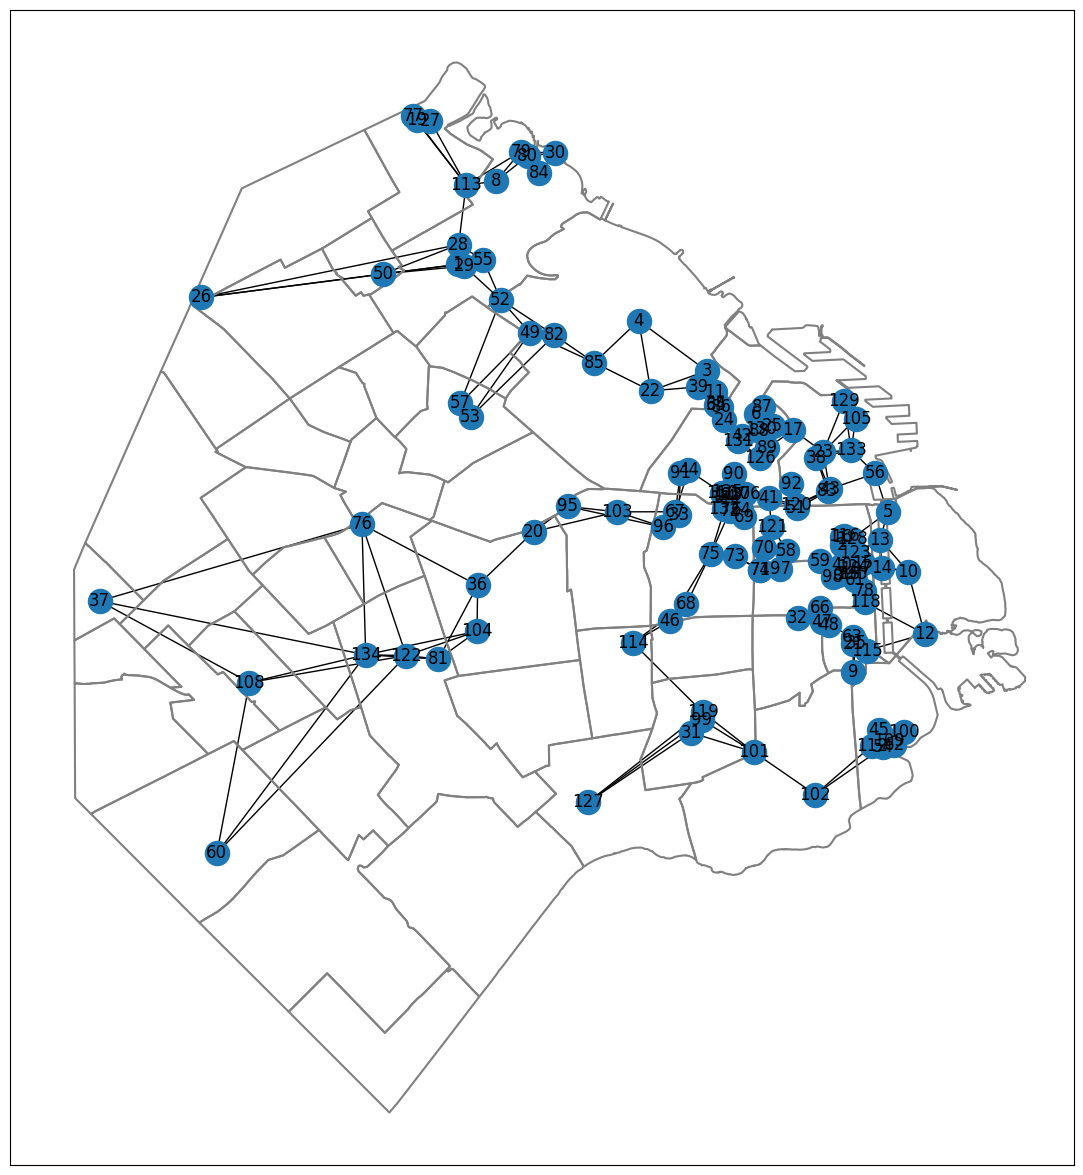

In [7]:
fig, ax = plt.subplots(figsize=(15, 15)) # Visualización de la red en el mapa
barrios.to_crs("EPSG:22184").boundary.plot(color='gray',ax=ax) # Graficamos Los barrios
nx.draw_networkx(G,G_layout,ax=ax) # Graficamos los museos

# Resolución del TP

Aquí empieza la aventura... ¡diviertanse y consulten lo que necesiten!

# Punto 1:





##Resolucion

Tenemos que probar la igualdad:

$$
M ⋅ p = B
$$

donde:

$$
M = \frac{N}{\alpha} \left( I - (1 - \alpha) \; C \right) \quad \text {y } \, B = 1 \\[12pt]
$$


A partir de los datos dados vamos a manipular algebraicamente esta ecuación para llegar a la forma:

&nbsp;


$$
M ⋅ p = B \quad \text {tal que} \quad M ⋅ p = 1 \\[12pt]
$$

Partimos de la ecuacion (3):

&nbsp;

$$
p = (1 - \alpha)\, C ⋅ p \, + \, \frac {α}{N} \cdot 1 \\[12pt]
$$

Reordeno la ecuacion (3) para que me queden juntos los valores de $p$:

&nbsp;

$$
p - (1 - \alpha)\, C p \, = \, \frac {α}{N} \\[12pt]
$$

$$ \left( I - (1 - \alpha) \; C \right) \; \cdot \; p \; = \; \frac {α}{N} \\[12pt] $$

$$ \frac {N}{\alpha} \; \left( I - (1 - \alpha) \; C \right) \; \cdot \; p \; = \; 1 \\[12pt] $$

$$ M \; \cdot \; p \; = \; 1 \\[8pt]$$

#### De esta manera probamos que el vector de rankings $p$ es solucion de la ecuacion

<font color='green'>Nico: Bien! Observar que hay que pedir alfa != 0 para que no se indefina lo anterior</font>

# Punto 2:


##Resolucion

Para que exista una unica solucion para el sitema de ecuaciones $M ⋅ p = b$ donde:

&nbsp;

$$ M = \frac{N}{\alpha} \left( I - (1 - \alpha) \; C \, \right) \quad \text {y } \, B = 1 \\[12pt] $$

Necesitamos que la matriz $M$ sea inversible:

&nbsp;

$$ M \, ⋅ \, p \; = \; B \quad ⟹ \quad p \; = \; (M)^{-1} \; \cdot \; B \\[8pt]$$

$$ \exists\, M^{-1} \;\Rightarrow\; \exists!\, p \\[10pt] $$

Si existe la inversa de $M$ existe una unica solucion $p$

&nbsp;

El enunciado nos brinda que $0 < α < 1$ , por lo tanto, esto nos permite ver que la inversibilidad de la matriz depende exlclusivamente de $(I - (1 - α) \, C)$ tal que:

&nbsp;

$$ M^{-1} \; = \left( \; \frac{N}{\alpha} \left( I - (1 - \alpha) \; C \, \right) \, \right)^{-1} \\[10pt] $$

$$ M^{-1} \; = \; \frac{α}{N} \, \left( I - (1 - \alpha) \; C \, \right)^{-1} \\[8pt] $$

$$ \; \frac{α}{N} \neq 0 \; \text{ya que} \; \alpha \in (0,1) \\[12pt]$$

De esta forma vemos que $\frac{α}{N}$ es solamente un factor escalar de $M$

Por lo tanto solo quedaria ver que $(\, I \, - \, (\,1\, - α\,) \, C \,) $ sea inversible.

Vamos a probar que $M$ es siempre inversible

Demostremoslo por reduccion al absurdo:

&nbsp;

$$ \text{Consideremos la matriz } A \; = \; I \; -\; (\;1\;-\;\alpha\;)\;C \\[10pt]$$
$$ \text{Supongamos que } A \text{ no es inversible. Entonces existe un vector } x \neq 0 \text{ tal que } Ax = 0. \\[10pt]$$
$$ \text{Es decir: } (I \, -\,  (\,1\,-\,\alpha\,)\,C)\,x\, =\, 0 \\[10pt]$$
$$ \text{Reordenando en funcion de $x$ : }\;  x \,  =\,  (\,1\,-\,\alpha\,)\;Cx \\[10pt]$$
$$ \text{Llamemos } \theta = 1-\alpha \text{, entonces } 0 \, < \,  \theta\,  < \,1 \, \text{ ya que } 0 < \alpha < 1. \\[10pt]$$
$$ \text{Tenemos: } x \,=\, \theta \;Cx \\[10pt] $$
$$ \text{Tomando la norma-1 en ambos lados: } \|x\|_1 = \| \theta \;Cx\|_1 = \theta \, \|Cx\|_1 \\[10pt]$$

<font color='green'>Nico: Observando que el escalar sale con módulo pero en este caso es positivo, ok</font>


$$\text{Como } C \text{ es una matriz estocástica por columnas y todos sus elementos son no negativos, tenemos que} \|Cx\|_1 \leq \|x\|_1 \text{ para cualquier vector } x. \\[10pt]$$
$$\text{Luego: } \; \|x\|_1\; =\; \theta \, \|Cx\|_1\; \leq\; \theta\, \|x\|_1 \; <\; \|x\|_1  \quad ⇒ \quad \text{Abs!} \\[10pt]$$

<font color='green'>Nico: Usando la propiedad que norma1 matricial es submultiplicativa </font>
&nbsp;

Concluimos entonces que no existe ningun vector $ v \, \neq \, 0\,$ tal que $Av \, = \, 0\, $ , donde  $ A \, =\, (\, I \, - \, (\,1\, - α\,) \, C \,) \,$. Lo que implica que $A$ es invertible para todo $\,0 < α < 1$.

Como $\frac{α}{N}$ es un factor escalar, podemos decir entonces que $M$ es  siempre invertible para todo  $\,0 < α < 1$

Queda demostrado, por reduccion al absurdo, que siempre $\exists \; M^{-1} \;$ tal que exista una unica solucion de $p$ para todo $\,0 < α < 1$

In [8]:

!wget https://raw.githubusercontent.com/jerovernay/tp-Alc/refs/heads/main/codigo/Codigo_Estructura_TP1/template_funciones_TP1.py -O template_funciones_TP1.py


from template_funciones_TP1 import *


--2025-06-01 18:33:05--  https://raw.githubusercontent.com/jerovernay/tp-Alc/refs/heads/main/codigo/Codigo_Estructura_TP1/template_funciones_TP1.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6090 (5.9K) [text/plain]
Saving to: ‘template_funciones_TP1.py’

template_funciones_ 100%[===================>]   5.95K  --.-KB/s    in 0s      

2025-06-01 18:33:05 (55.8 MB/s) - ‘template_funciones_TP1.py’ saved [6090/6090]



# Punto 3:

<font color='orange'>Nico: Observación del código. Las matrices con las que trabajamos tienen factorización LU y no necesitán pivoteo. Les diría que dejen de lado toda la complejidad adicional que introdujeron al considerar permutaciones en los algoritmos de calculaLU </font>

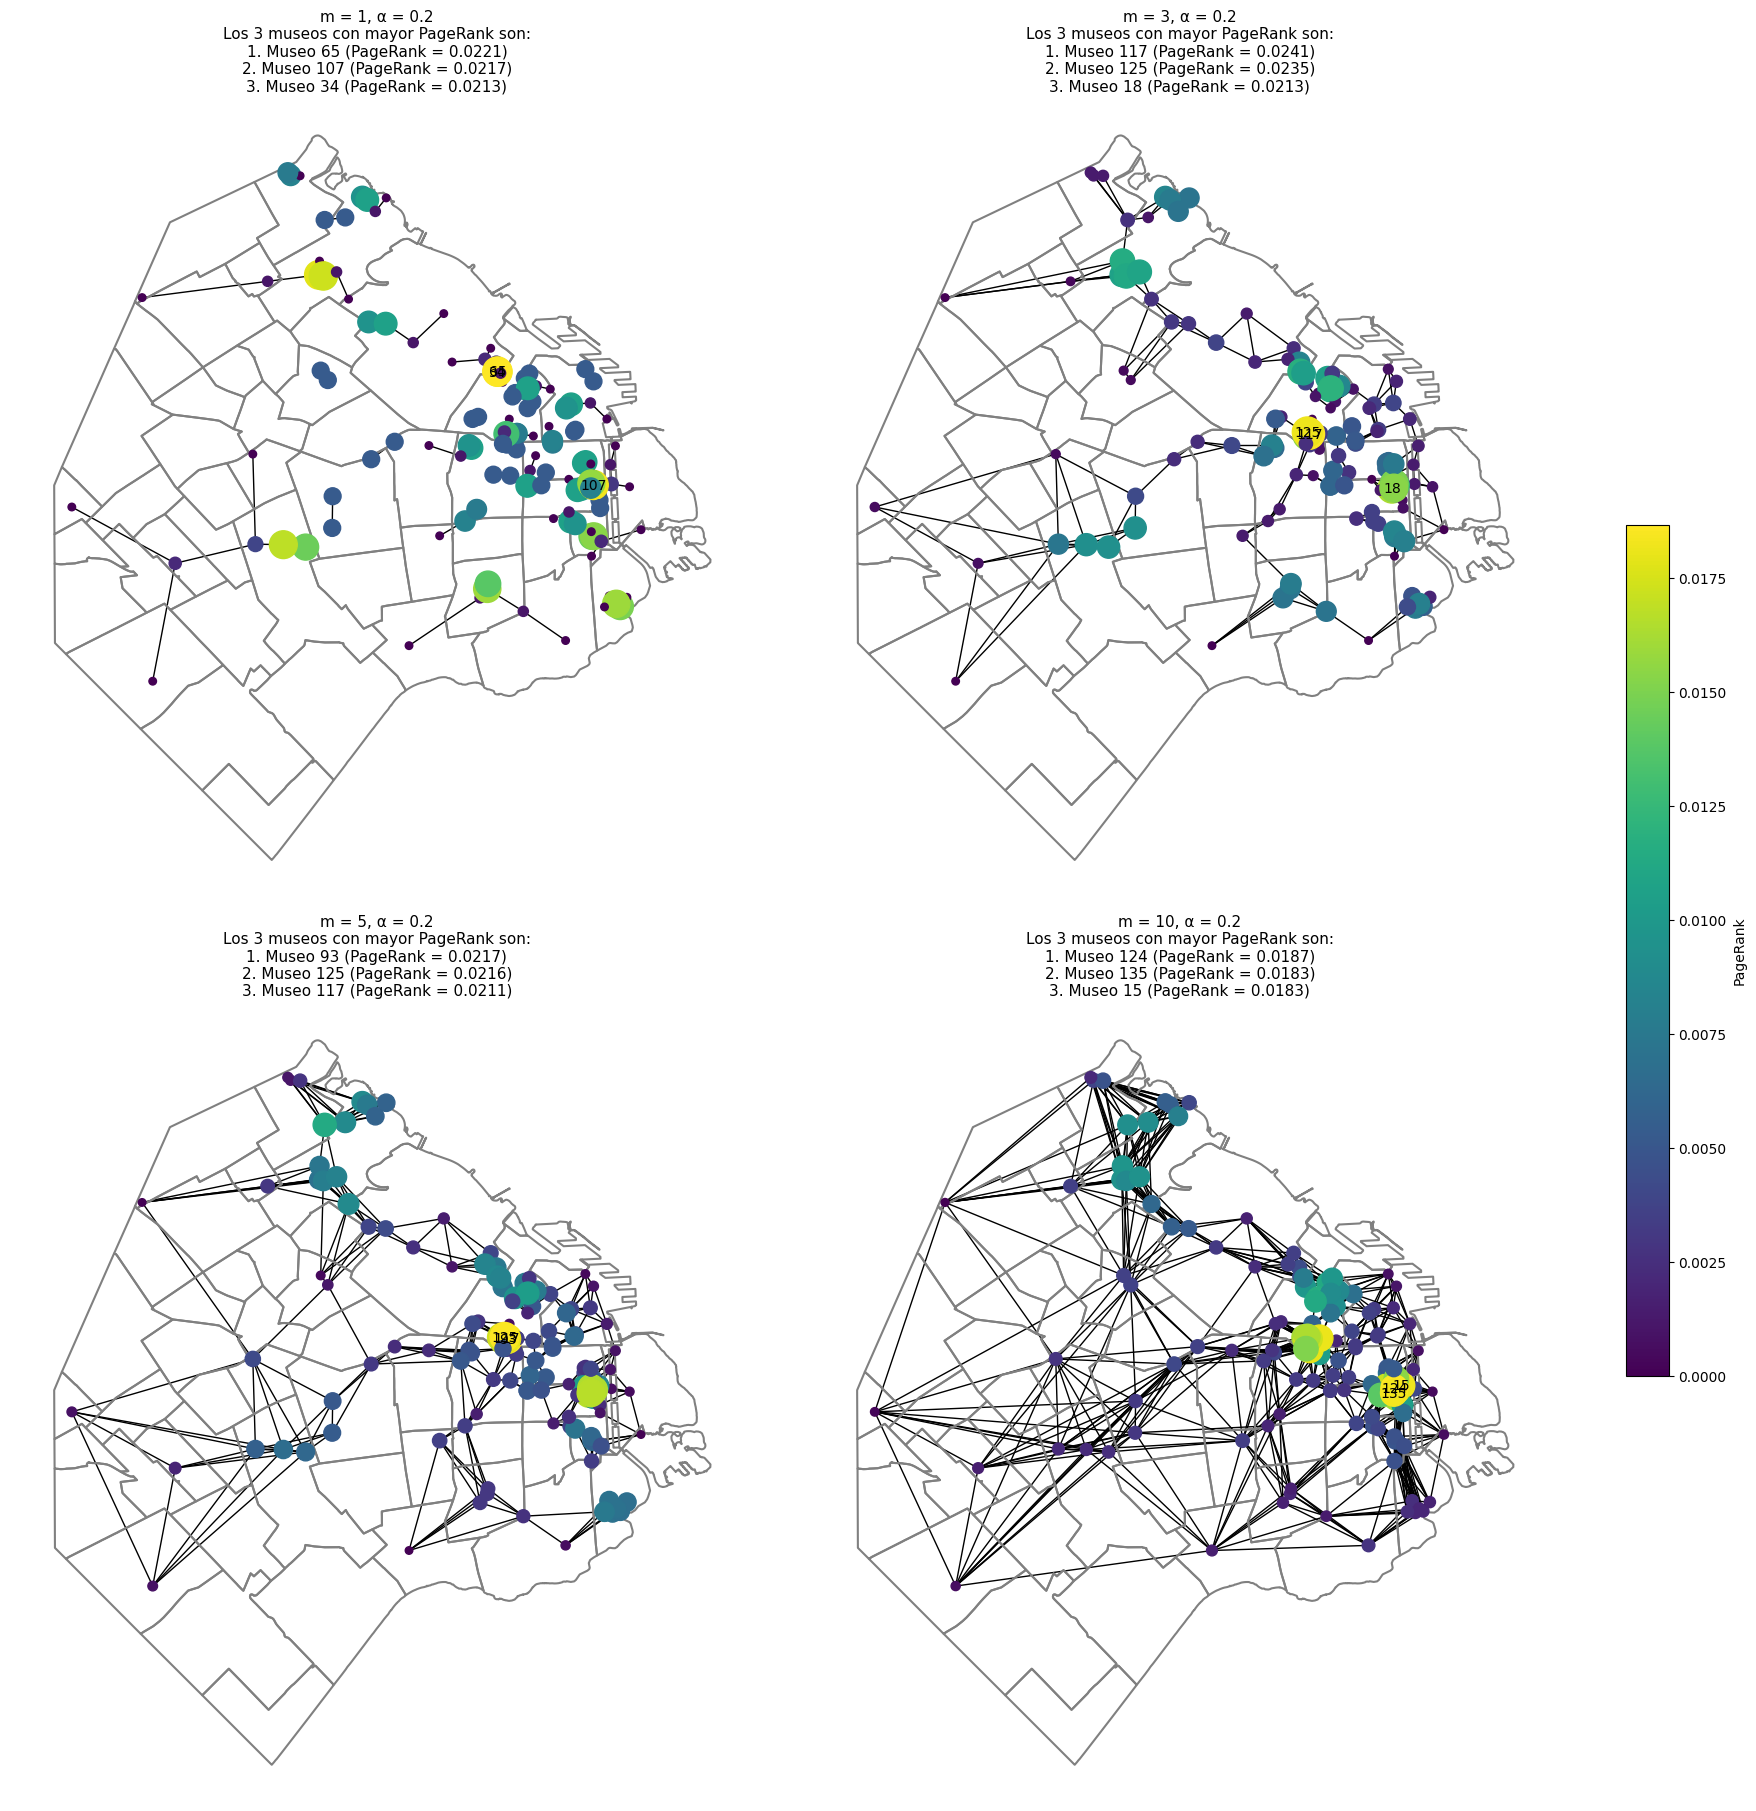

In [10]:
from scipy.linalg import solve_triangular

# Configuramos la figura con 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 18), constrained_layout=True)
axs = axs.flatten()

# Aca variamos los datos, con m y alpha

valores_m = [1, 3, 5, 10] # Cantidad de links por nodo
alpha = 1/5 # Factor de amortiguamiento

for i, m in enumerate(valores_m):
    A = construye_adyacencia(D,m) # Construimos la matriz de adyacencia
    page_Rank = calcula_pagerank(A, alpha) # Realizamos el calculo
    page_Rank = page_Rank / np.sum(page_Rank) # Normalizamos para hacer mas viable la visualizacion

    # Construccion del Mapa sin nada:

    barrios.to_crs("EPSG:22184").boundary.plot(color='gray',ax=axs[i]) # Graficamos Los barrios

    # Armado del mapa

    factor_escala = 2e4  # Escalamos los nodos para que sean visibles "(esto puedo variar)" !!!

    # Construccion del mapa de redes
    G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia

    # Construimos un layout a partir de las coordenadas geográficas
    G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}


    Nprincipales = 3 # Cantidad de principales
    principales = np.argsort(page_Rank)[-Nprincipales:] # Identificamos a los N principales

    #3 museos principales

    top3 = "\n".join([
        f"{j+1}. Museo {idx} (PageRank = {page_Rank[idx]:.4f})"
        for j, idx in enumerate(principales[::-1]) # Invertir para mostrar en orden descendente
         ])

    labels = {n: str(n) if n in principales else "" for n in G.nodes} # Nombres para esos nodos


    # Graficamos red

    nx.draw_networkx(G,G_layout,
                 node_size = page_Rank*factor_escala,
                 node_color = page_Rank,
                 cmap = plt.cm.viridis,
                 ax=axs[i],
                 with_labels=False)
    nx.draw_networkx_labels(G, G_layout, labels=labels, font_size=10, font_color="k", ax = axs[i]) # Agregamos los nombres




    # Añadimos título y leyenda
    axs[i].set_title(f'm = {m}, α = {alpha}\nLos 3 museos con mayor PageRank son:\n{top3}', fontsize=11)
    axs[i].axis('off')

#creamos la barra de colores
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=page_Rank.max()))
sm._A = []
cbar = plt.colorbar(sm, ax=axs.tolist(), shrink=0.5)
cbar.set_label("PageRank")
plt.show()

#B)

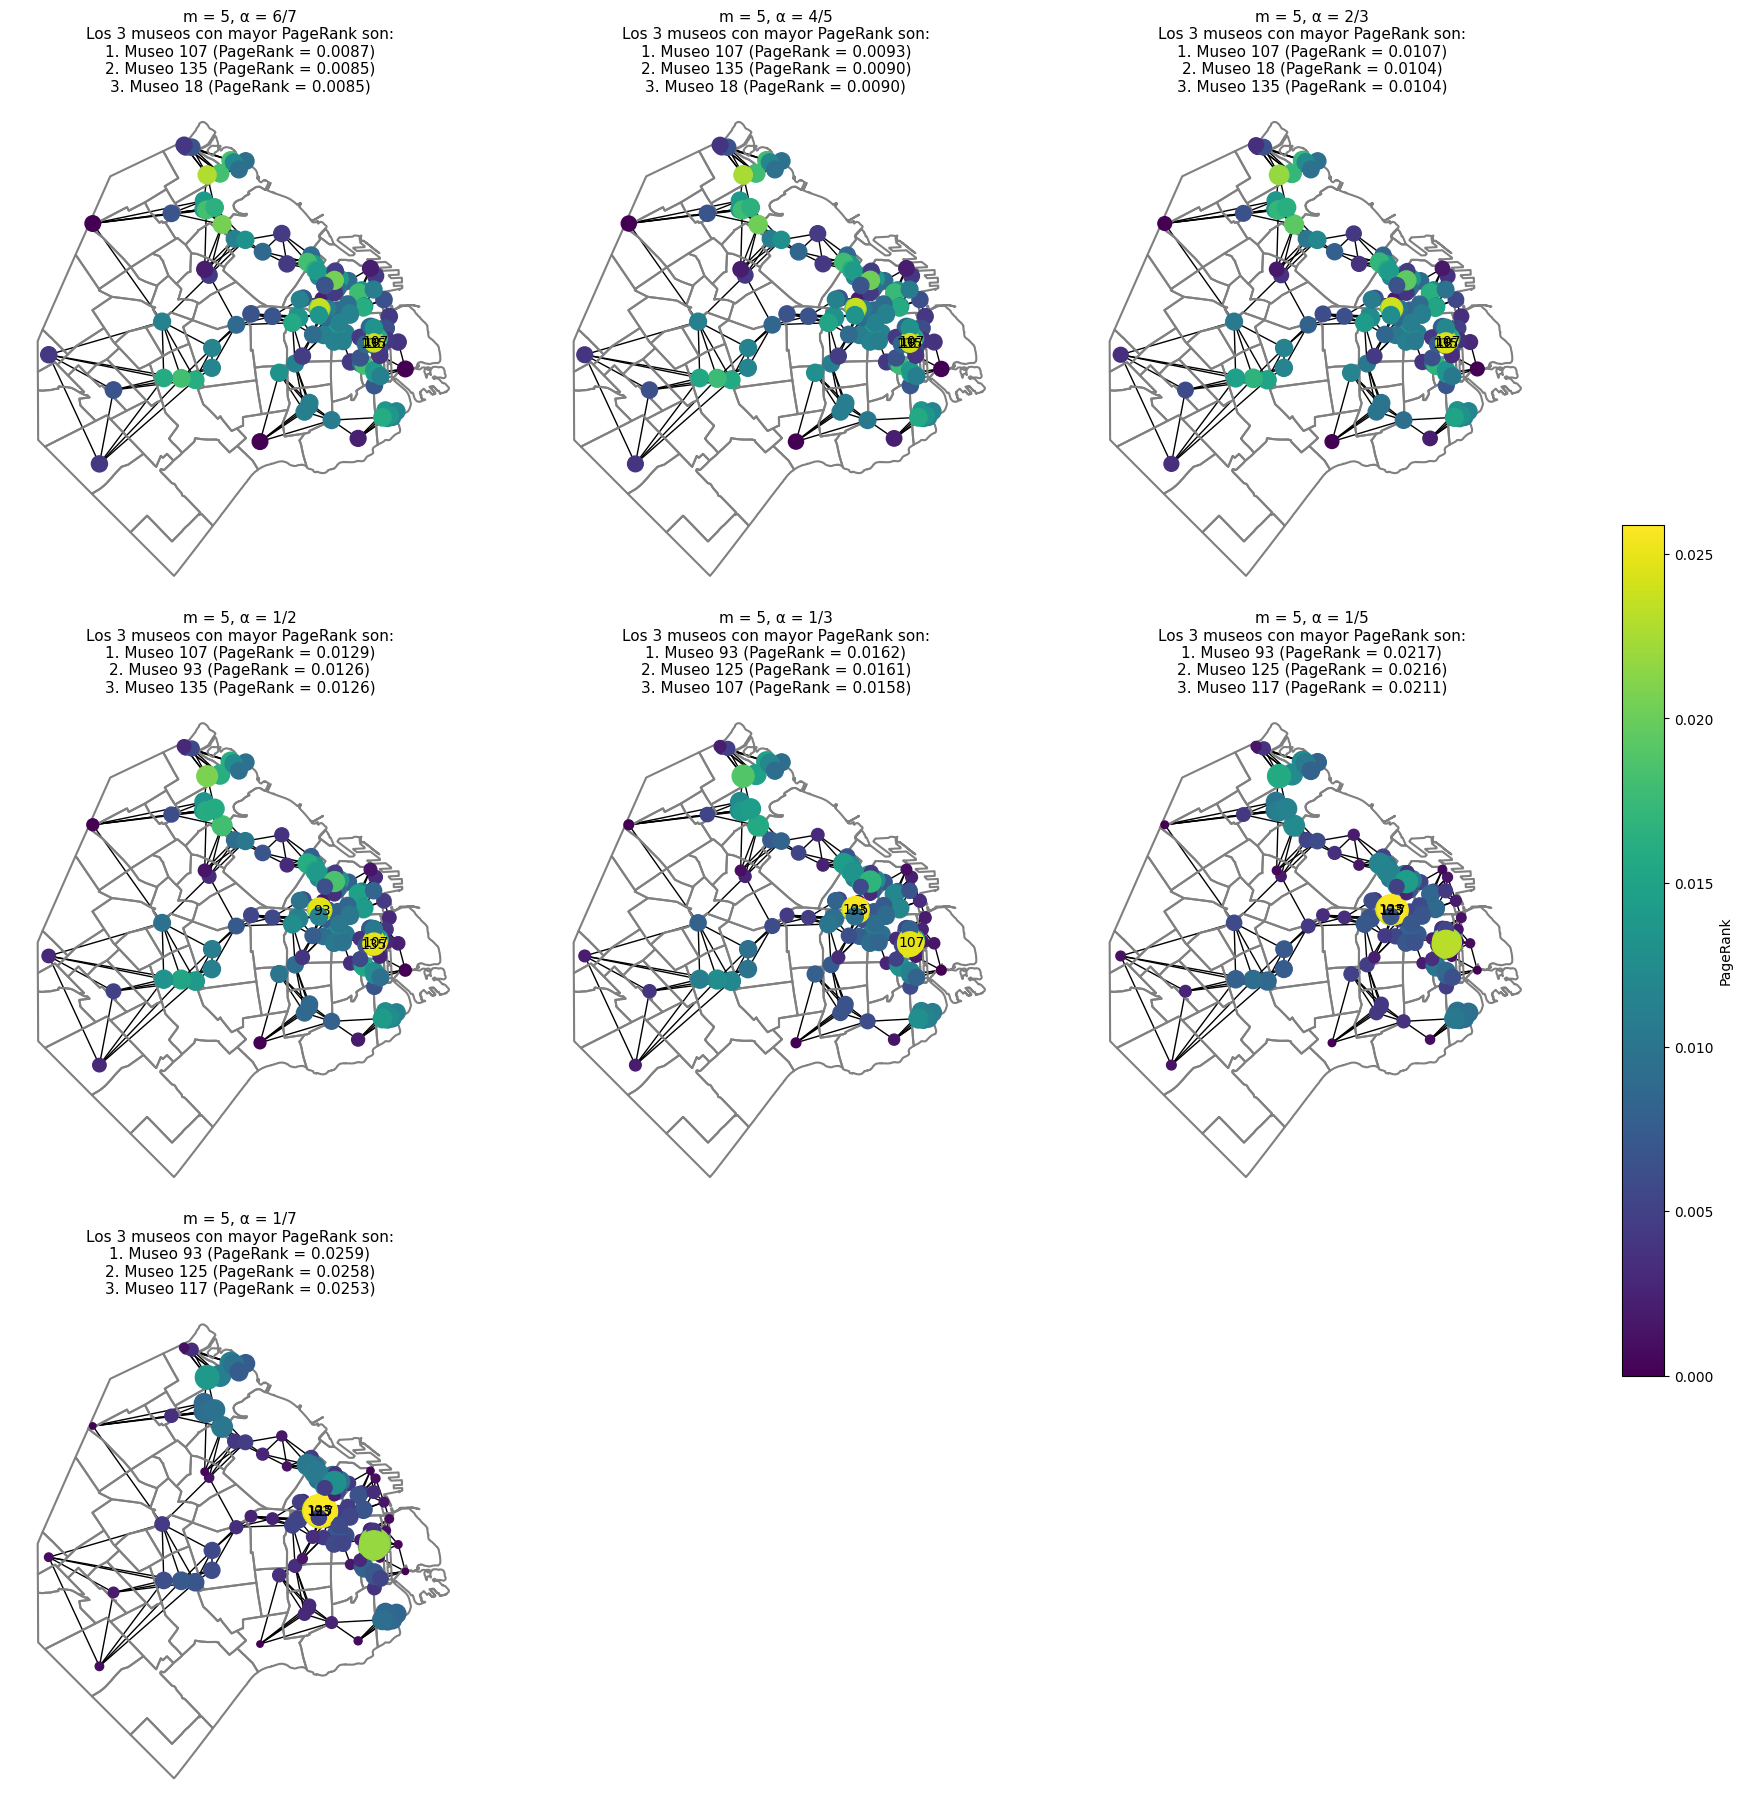

In [11]:
#Ahora vamos a hacer lo mismo pero dejando m fijo (m=5) y variando el alpha
from scipy.linalg import solve_triangular
import math

# Aca variamos los datos, con m y alpha

valores_alpha = [6/7, 4/5, 2/3, 1/2, 1/3, 1/5, 1/7]
fracciones_alpha = ['6/7', '4/5', '2/3', '1/2', '1/3', '1/5', '1/7'] # Para poder ponerlo como fraccion en el titulo
m = 5

# Creamos la cantidad de subplots que necesitamos
n = len(valores_alpha)
columnas = 3
filas = math.ceil(n / columnas)

fig, axs = plt.subplots(filas, columnas, figsize=(6 * filas, 6 * columnas), constrained_layout=True)
axs = axs.flatten()

for i, alpha in enumerate(valores_alpha):
    A = construye_adyacencia(D,m) # Construimos la matriz de adyacencia
    page_Rank = calcula_pagerank(A, alpha) # Realizamos el calculo
    page_Rank = page_Rank / np.sum(page_Rank) # Normalizamos para hacer mas viable la visualizacion

    # Construccion del Mapa sin nada:

    barrios.to_crs("EPSG:22184").boundary.plot(color='gray',ax=axs[i]) # Graficamos Los barrios

    # Armado del mapa

    factor_escala = 2e4  # Escalamos los nodos para que sean visibles "(esto puedo variar)" !!!

    # Construccion del mapa de redes
    G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia

    # Construimos un layout a partir de las coordenadas geográficas
    G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}


    Nprincipales = 3 # Cantidad de principales
    principales = np.argsort(page_Rank)[-Nprincipales:] # Identificamos a los N principales

    #3 museos principales

    top3 = "\n".join([
        f"{j+1}. Museo {idx} (PageRank = {page_Rank[idx]:.4f})"
        for j, idx in enumerate(principales[::-1]) # Invertir para mostrar en orden descendente
         ])

    labels = {n: str(n) if n in principales else "" for n in G.nodes} # Nombres para esos nodos


    # Graficamos red

    nx.draw_networkx(G,G_layout,
                 node_size = page_Rank*factor_escala,
                 node_color = page_Rank,
                 cmap = plt.cm.viridis,
                 ax=axs[i],
                 with_labels=False)
    nx.draw_networkx_labels(G, G_layout, labels=labels, font_size=10, font_color="k", ax = axs[i]) # Agregamos los nombres

    # Añadimos título y leyenda
    axs[i].set_title(f'm = {m}, α = {fracciones_alpha[i]}\nLos 3 museos con mayor PageRank son:\n{top3}', fontsize=11)
    axs[i].axis('off')

# Eliminamos subplots vacíos (tenemos 9 y necesitamos 7)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

#creamos la barra de colores
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=page_Rank.max()))
sm._A = []
cbar = plt.colorbar(sm, ax=axs.tolist(), shrink=0.5)
cbar.set_label("PageRank")
plt.show()

<font color='green'>Nico: Bien!Buen uso de los colores. Probaron variar solamente el atributo de color y fijar el tamaño? Tal vez así eviten que aparezcan los nodos amontonados en el centro</font>

<font color='orange'>Nico: Los resultados "parcen" bien. Sin embargo:</font>


<font color='orange'>Nico: Todo el código que genera estas figuras tiene que entregarse de manera que pueda ser reproducible.</font>


<font color='green'>Nico: Además de la sugerencia que les había hecho más arriba, podrían considerar plotear todos los mapas en subplot, uno al lado del otr. De esta forma sería más legible y comparable para su posterior discusión.</font>

<font color='orange'>Nico: Lo mismo acá. El código que permite generar esta figura debería ser reproducible sin harcodear los resultados. De hecho, observo diferencias respecto a los resultados esperado y no puedo corroborar por donde le pifiaron.</font>


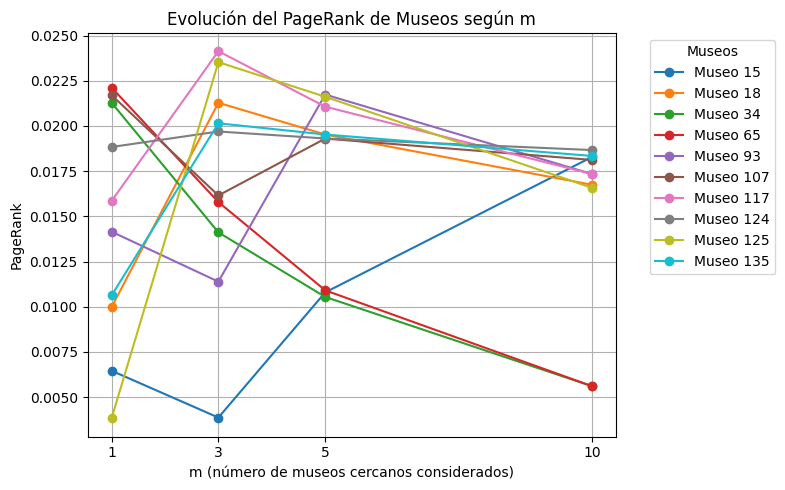

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#para este grafico vamos a dejar fijo el alpha y variamos el m
alpha = 1/5
m_values = [1, 3, 5, 10]

# incluimos todos los museos que aparecen alguna vez en el podio
id_museos_reales = np.array([
    15, 18, 34, 65, 93, 107, 117, 124, 125, 135
])

# Diccionario para guardar la evolución del PageRank
infopage_rank = {id_real: [] for id_real in id_museos_reales}

# Repetimos para cada valor de m
for m in m_values:
    A = construye_adyacencia(D, m)
    Page_Rank = calcula_pagerank(A, alpha)
    Page_Rank = Page_Rank / np.sum(Page_Rank)  # Normalización para visualización

    # Asociamos cada valor con su id_real
    for id_real in id_museos_reales:
        infopage_rank[id_real].append(Page_Rank[id_real])


# Graficamos la evolucion de page rank
plt.figure(figsize=(8, 5))

for museo_id, valores in infopage_rank.items():
    plt.plot(m_values, valores, marker='o', label=f'Museo {museo_id}')

plt.title('Evolución del PageRank de Museos según m')
plt.xlabel('m (número de museos cercanos considerados)')
plt.ylabel('PageRank')
plt.xticks(m_values) # usamos los valores m en el eje x
plt.grid(True)
# agregamos el titulo
plt.legend(title='Museos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


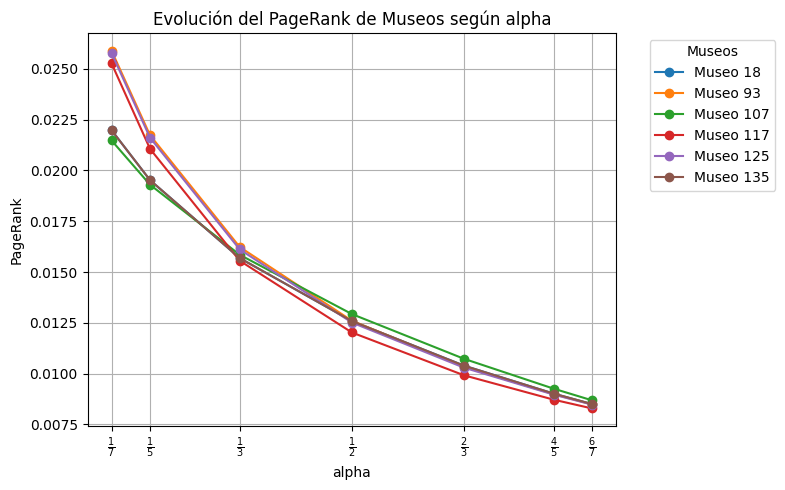

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Fijamos m
m = 5

# Distintos valores de alpha
valores_alpha = [1/7, 1/5, 1/3, 1/2, 2/3, 4/5, 6/7]

# mostramos alpha como fracciones en el grafico
labels_frac = [r"$\frac{1}{7}$", r"$\frac{1}{5}$", r"$\frac{1}{3}$", r"$\frac{1}{2}$",
               r"$\frac{2}{3}$", r"$\frac{4}{5}$", r"$\frac{6}{7}$"]

# incluimos todos los museos que aparecen alguna vez en el podio
id_museos = np.array([18, 93, 107, 117, 125, 135])

# Diccionario para guardar la evolución del PageRank según alpha
infopage_rank = {id_real: [] for id_real in id_museos}

# Recorremos los valores de alpha
for alpha in valores_alpha:
    A = construye_adyacencia(D, m)  # m fijo
    Page_Rank = calcula_pagerank(A, alpha)
    Page_Rank = Page_Rank / np.sum(Page_Rank)  # Normalización

    # Asociamos cada valor con su id_real
    for id_real in id_museos:
        infopage_rank[id_real].append(Page_Rank[id_real])

# Graficamos la evolucion de page rank de cada museo mientras varia alpha
plt.figure(figsize=(8, 5))

for museo_id, valores in infopage_rank.items():
    plt.plot(valores_alpha, valores, marker='o', label=f'Museo {museo_id}')

plt.title('Evolución del PageRank de Museos según alpha')
plt.xlabel('alpha')
plt.ylabel('PageRank')
plt.xticks(valores_alpha, labels_frac)  # etiquetas como fracciones, usamos los valores de alpha en el eje x
plt.grid(True)
# agregamos el titulo
plt.legend(title='Museos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#B)

De los graficos realizados para el punto 3b y 3c podemos sacar las siguientes conclusiones:
  - Al aumentar m los museos mas alejados disminuyen su valor de page rank. Se puede ver claramente como museos en las afueras que antes tenian un page rank similar a los centrales, pierden relevancia a medida que el valor de m aumenta. Mientras que los museos mas centricos suben y se quedan con el podio.

  - Cuanto mas grande sea el alpha, menor sera el page rank. Esto aplica para tanto para los museos centricos como para los alejados. Si bien el podio se mantiene en la zona centrica, con los valores de alpha mas altos la diferencia entre el page rank de los museos centricos y los alejados disminuye en gran medida.


<font color='orange'>Nico: Toda esta discusión necesita profundidad. Es importante no solo relatar lo que se osberva en el gráfico si no intentar explicarlo y generar observaciones interesantes.</font>


<font color='orange'>Para profundizar la discusión, identifiquen casos concretos en el mapa que respalde lo que dicen en su discusión previa. Traten de explicar, en función de la intuición que se tiene del modelo, porqué tal museo mejora su ranking al incrementar m (o al revés). Prestar atención a la importancia de sus museos vecinos, las conexiones entrantes, etc. Apoyense en los gráficos de mapas y el de curvas. Puede ser importante mostrar las "flechas" del grafo. </font>

<font color='orange'>También tengan presente las pregunta de estabilidad. Contestar esa pregunta con precisión involucraría definir algún tipo de métrica para "estabilidad". Una forma sería contar cantidad de permutaciones al variar m. No hace falta que lo hagan (aunque estaría bueno). Otra cosa que podría verse "a ojo" es en que intervalo de m o alfa el ranking es más inestable. Todo lo anterior son sugerencias para que puedan darle una vuelta más a esta pregunta </font>





# Punto 4:

##Resolucion

El enunciado nos brinda informacion muy relevante a la hora de resolver el ejercicio. Sabemos que:

&nbsp;

$$ r \; = \; \text {cantidad de museos visitados por cada persona} \\[12pt]$$
$$ w \; = \; \text {vector que representa el numero total de visitantes de cada museo} \\ \; w_i \; = \; \text {cantidad de visitantes totales del museo } i \\[12pt]$$
$$ v \; = \; \text {numero de personas totales que inician en cada museo} \\ v_i \; = \; \text {numero de personas totales que inician en el museo } i \\[12pt]$$
$$ B \; = \; \sum_{k=0}^{r-1} C^k \\[12pt]$$
$$ C \; = \; \text{Matriz de Transiciones} \\[10pt]$$

En base al "Tip" del enunciado:

"si v da el número de visitantes que entraron a la red en cada museo, entonces luego de k pasos podemos esperar la distribución C^k·v sobre el total de museos"

Entonces,

&nbsp;

$$ v \; = \; \text {vector inicial de visitantes (r = 1)} \\[8pt]$$
$$ C \; \cdot \; v \; = \; \text{distribucion de viistantes tras un paso (r = 2)} \\[8pt]$$
$$ C \, ^2 \; \cdot \; v \; = \; \text{distribucion de viistantes tras dos pasos (r = 3)} \\[8pt]$$
$$ C \, ^{r-1} \; \cdot \; v \; = \; \text{distribucion de visitantes tras r - 1 pasos} \\[8pt]$$

Por lo tanto el numero de visitantes de $w$ sera la suma de todos estos vectores, llegando asi al numero total. De forma:

&nbsp;

$$ w \; = \; v \; + \; C \cdot v \; + \; C \, ^2 \cdot v \; + \; ... \; + \; C \, ^{r-1} \cdot v \; \\[8pt]$$
$$ \text {Esto puede ser escrito como:} \\[8pt]$$
$$ w \; = \; \left(\; I \; + \; C \; + \; C \, ^2 \; + \; ... \; + \; C \, ^{r-1}\; \right) \cdot v \\[8pt]$$
$$ w \; = \; (\; \sum_{k=0}^{r-1} C\,^k \; ) ⋅ v$$

Donde $I$ es la matriz identidad, por $C\, ^0$

Con la definicion de $B$ tenemos entonces que:

&nbsp;

$$ w \; = \; B \; \cdot \; v \\[10pt]$$

Despejamos para encontrar $v$ en terminos de $w$ tal que:

&nbsp;

$$ v \; = \; B \, ^{-1} \; \cdot \; w \\[8pt]$$

Demostrando entonces lo que nos pedian


<font color='green'>Nico: Bien! Asumiendo que B es inversible por supuesto </font>

# Punto 5:


--2025-06-01 18:33:20--  https://raw.githubusercontent.com/jerovernay/tp-Alc/refs/heads/main/codigo/Codigo_Estructura_TP1/visitas.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3400 (3.3K) [text/plain]
Saving to: ‘visitas.txt’

visitas.txt         100%[===================>]   3.32K  --.-KB/s    in 0s      

2025-06-01 18:33:20 (50.6 MB/s) - ‘visitas.txt’ saved [3400/3400]

Vector W :  [3866. 2310. 3922. 2942. 1932. 2779. 3209. 5472. 1862. 2501. 2218. 2575.
 2362. 3039. 2781. 3449. 3811. 3208. 4049. 3120. 1922. 3224. 2166. 2919.
 2731. 3053. 1275. 2659. 2073. 2873. 2620. 2185. 3097. 2773. 4572. 3800.
 2586. 1582. 2986. 2509. 3345. 3290. 3682. 3607. 2795. 2165. 2884. 3533.
 2631. 2615. 1554. 3938. 2463. 1842. 2765. 2736. 2998. 2512. 2884. 3158.
 1276. 316

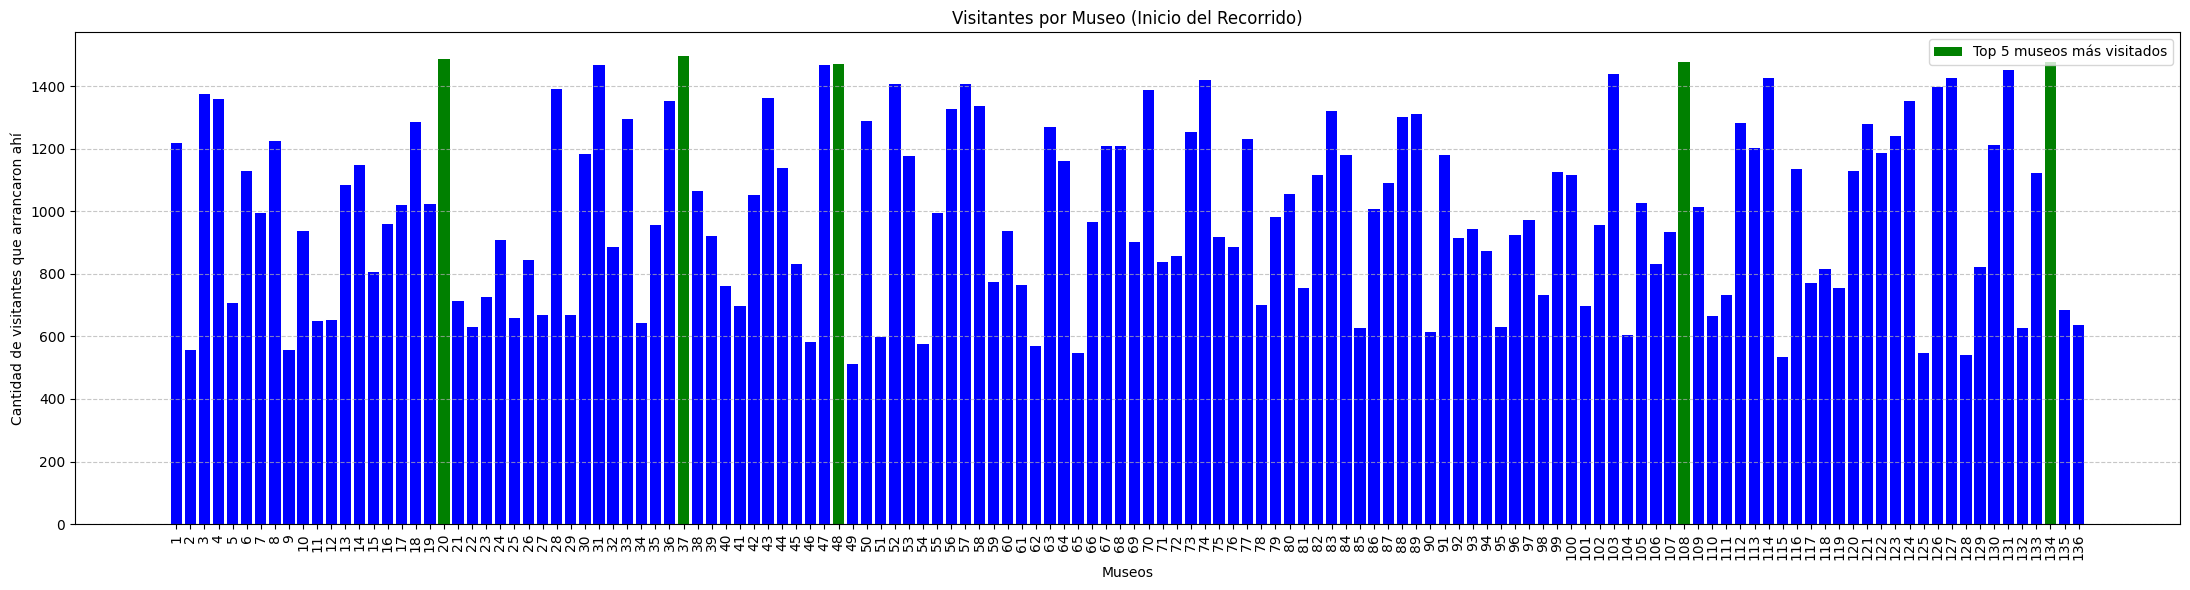



Los 5 museos más visitados son:
Museo 37: 1497 visitantes
Museo 20: 1486 visitantes
Museo 108: 1478 visitantes
Museo 134: 1477 visitantes
Museo 48: 1470 visitantes


In [14]:
from matplotlib.patches import Patch
!wget https://raw.githubusercontent.com/jerovernay/tp-Alc/refs/heads/main/codigo/Codigo_Estructura_TP1/visitas.txt



%load_ext autoreload
%autoreload 2



W = np.loadtxt('visitas.txt')


r = 3
C = calcula_matriz_C_continua(D)
B = calcula_B(C,r)
B_inversa = inversa_por_lu(B)
V = B_inversa @ W



norma_V = np.linalg.norm(V,1)

norma_W = np.linalg.norm(W,1)


print("Vector W : ", W, '\n' )
print("Vector V : ", V ,'\n')
print("¿V <= W? :", (V <= W).all(), '\n') #Veo que todos los valores de V sean menores a los de W, como chequeo de que esten bien hechas las matrices
print("La norma 1 de V, es decir la cantidad total estimada de visitantes es :", norma_V,'\n' ) #Respuesta del Ejercicio



#Grafico de V#

# Crear los nombres de los museos como "Museo 0", "Museo 1", ..., "Museo 135"
museos = [f"{i + 1}" for i in range(len(V))]


# Identifico los índices de los 5 museos con más visitantes (como detalle)

top_5_indices = np.argsort(V)[-5:]

# Pongo color verde para los top 5

colores = ['blue'] * len(V)
for idx in top_5_indices:
    colores[idx] = 'green'  # Color verde para los top 5


# Graficar
plt.figure(figsize=(22, 6))
plt.bar(museos, V, color = colores)
plt.xlabel("Museos")
plt.ylabel("Cantidad de visitantes que arrancaron ahí")
plt.title("Visitantes por Museo (Inicio del Recorrido)")
plt.xticks(rotation=90)  # Rota etiquetas del eje X
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Rejilla en el eje Y


# Añadir leyenda
legend_elements = [
    Patch(facecolor='green', label='Top 5 museos más visitados')
]

plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()  # Ajusta los márgenes para que no se superpongan
plt.show()

print('\n')

# Mostramos cuáles son los 5 museos más visitados
print("Los 5 museos más visitados son:")
for idx in top_5_indices[::-1]:
    print(f"Museo {idx + 1}: {round(V[idx])} visitantes")

<font color='orange'>Nico: La idea está bien, pero el resultado no es correcto. Revisen la función calcula_cji porque tienen un bug en el cálculo del denominador. </font>


<font color='green'>Nico:Otro detalle, traten de no usar matrix power. No porque tenga algo malo, queremos tratar de no abusar el uso de numpy dejándolo para operaciones elementales únicamente. </font>

# Punto 6:

La ecuacion (6) del enunciado:

&nbsp;

$$ \frac{\|v - \tilde{v}\|_1}{\|v\|_1} \leq \text{cond}_1(B) \cdot \frac{\|w - \tilde{w}\|_1}{\|w\|_1} \\[10pt]$$

Nos dice que el error relativo de la solucion $v \,$ (el total de primeras visitas respectivamanete), esta acotado superiormente por el error relativo de los datos de $w \,$ multiplicado por el numero de condicion  $B \,$ de norma 1.

Como sabemos los datos de visitas tienen un error del 5% es decir:

&nbsp;
$$ \frac{\|w - \tilde{w}\|_1}{\|w\|_1} \; = \; 0.05\\[10pt] $$

Esto implica que el error relativo maximo de $v \,$ es:

&nbsp;
$$ v \; = \; \text{cond}_1(B) \cdot 0.05 \\[10pt]$$

Calculamos el numero de condicion de B y luego la cota para el error de estimacion de v.

Donde el numero de condicion esta dado por la formula:

&nbsp;
$$ \text{cond}_1(B) = \|B\|_1 \cdot \|B\;^{-1}\|_1$$

In [15]:


r = 3 # Calculamos sobre la misma cantidad que en el ejercicio 5
C = calcula_matriz_C_continua(D) # Hacemos C en base a lo obtenido del ejercicio y trabajamos con la matriz de distancias
B = calcula_B(C,r)

condB = nro_condicion_norma1(B)

print(condB * 0.05)


0.2525885588332503


<font color='orange'>Nico:Arrastran el error de arriba. El resto está bien, aunque les sugiero, nuevamente, no usar el norm de numpy para norma matricial :) </font>